In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import numpy as np

In [3]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
nonzero_df = diabetes_df.loc[list((diabetes_df.Glucose > 0) & (diabetes_df.BloodPressure > 0) & (diabetes_df.BMI > 0)), :,]
nonzero_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# Remove diabetes outcome target from features data
y = nonzero_df.Outcome.values
X = nonzero_df.drop(columns="Outcome").values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23) 

In [ ]:
# CODE BELOW IS TO DETERMINE IF THERE ARE ANY OUTLIERS TO REMOVE FOR INCREASED ACCURACY
# ONLY INTERESTED IN LOTS OF OUTLIERS NOT JUST 4 OR 5 PER CATEGORY

In [46]:
import matplotlib.pyplot as plt
X = diabetes_df.drop(columns="Outcome").values
X_df = pd.DataFrame(X)

In [60]:
for i in nonzero_df.columns.values:
    print(i)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


Pregnancies
[15, 17, 14, 14]


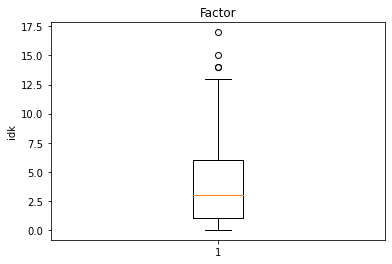

Glucose
[]


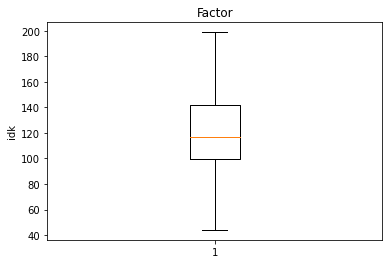

BloodPressure
[30, 110, 108, 122, 30, 110, 108, 110, 24, 38, 106, 106, 106, 114]


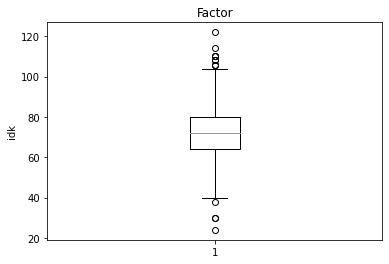

SkinThickness
[99]


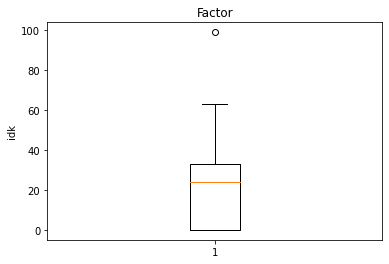

Insulin
[543, 846, 342, 495, 485, 495, 478, 744, 370, 680, 402, 375, 545, 360, 465, 415, 579, 474, 328, 480, 330, 600, 440, 540, 480, 335, 387, 392, 510]


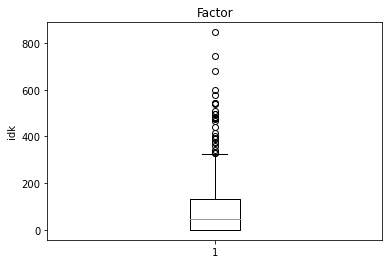

BMI
[53.2, 55.0, 67.1, 52.3, 52.9, 59.4, 57.3]


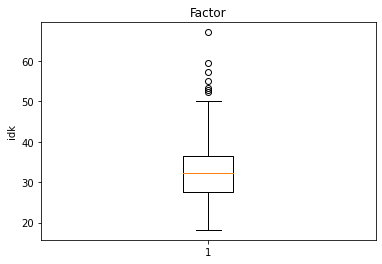

DiabetesPedigreeFunction
[2.288, 1.441, 1.39, 1.893, 1.781, 1.222, 1.4, 1.321, 1.224, 2.329, 1.318, 1.213, 1.353, 1.224, 1.391, 1.476, 2.137, 1.268, 1.6, 2.42, 1.251, 1.699, 1.258, 1.282, 1.698, 1.461, 1.292, 1.394]


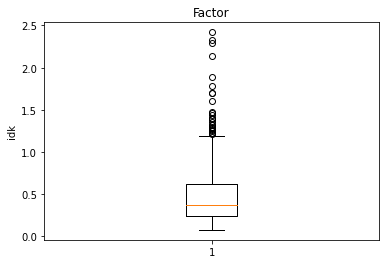

Age
[69, 67, 81, 67, 67, 70, 68]


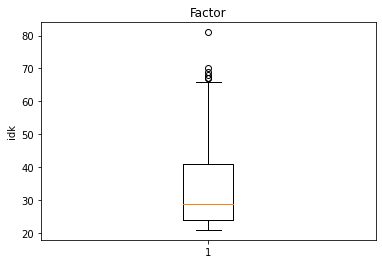

Outcome
[]


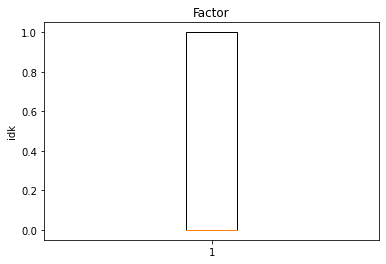

{'Pregnancies': (-6.5, 13.5),
 'Glucose': (36.375, 205.375),
 'BloodPressure': (40.0, 104.0),
 'SkinThickness': (-49.5, 82.5),
 'Insulin': (-195.75, 326.25),
 'BMI': (13.849999999999998, 50.25),
 'DiabetesPedigreeFunction': (-0.32875, 1.20125),
 'Age': (-1.5, 66.5),
 'Outcome': (-1.5, 2.5)}

In [74]:
outliers = []
bounds = {}

for i in nonzero_df.columns:
    
    factors = nonzero_df[i]
    fig1, ax1 = plt.subplots()
    ax1.set_title('Factor')
    ax1.set_ylabel('idk')
    ax1.boxplot(factors)
    print(i)
    quartiles = np.quantile(factors,[.25,.75])
    iqr = quartiles[1]-quartiles[0]
    lower_bound = quartiles[0]-(1.5*iqr)
    upper_bound = quartiles[1]+(1.5*iqr)
    bounds[i] = (lower_bound, upper_bound)
    potential_outliers = [i for i in factors if i < lower_bound or i > upper_bound]
    print(potential_outliers)
    plt.show()

bounds

In [75]:
# can potentially filter out any values from DF that fall outside the range 
nonzero_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
from sklearn import svm
import numpy as np
import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


In [12]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [ ]:
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
# VIEW BEST PARAMETERS

rf_random.best_params_
{'bootstrap': True,
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 400}

In [ ]:
# THEN COMPARE BASE MODEL TO RANDOM MODEL

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_accuracy = evaluate(base_model, test_features, test_labels)

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

In [ ]:
# NOW WE USE GRIDSEARCHCV USING THE BEST VALUES FROM RANDOM

In [15]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search.  DICTIONARY NEEDS TO BE EDITED WITH OUR BEST RANDOM VALUES

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(train_features, train_labels)
grid_search.best_params_
{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features, test_labels)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))
Improvement of 0.50%.

In [16]:
import sys

!$sys.executable -m pip install tensorflow

In [17]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten

In [23]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [24]:
import seaborn as sns

In [29]:
y = final_diabetes_df.Outcome.values
X = final_diabetes_df.drop(columns="Outcome").values
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

In [32]:
y_df

,0
0,1
1,0
2,1
3,0
4,1
...,...
1377,1
1378,0
1379,0
1380,0


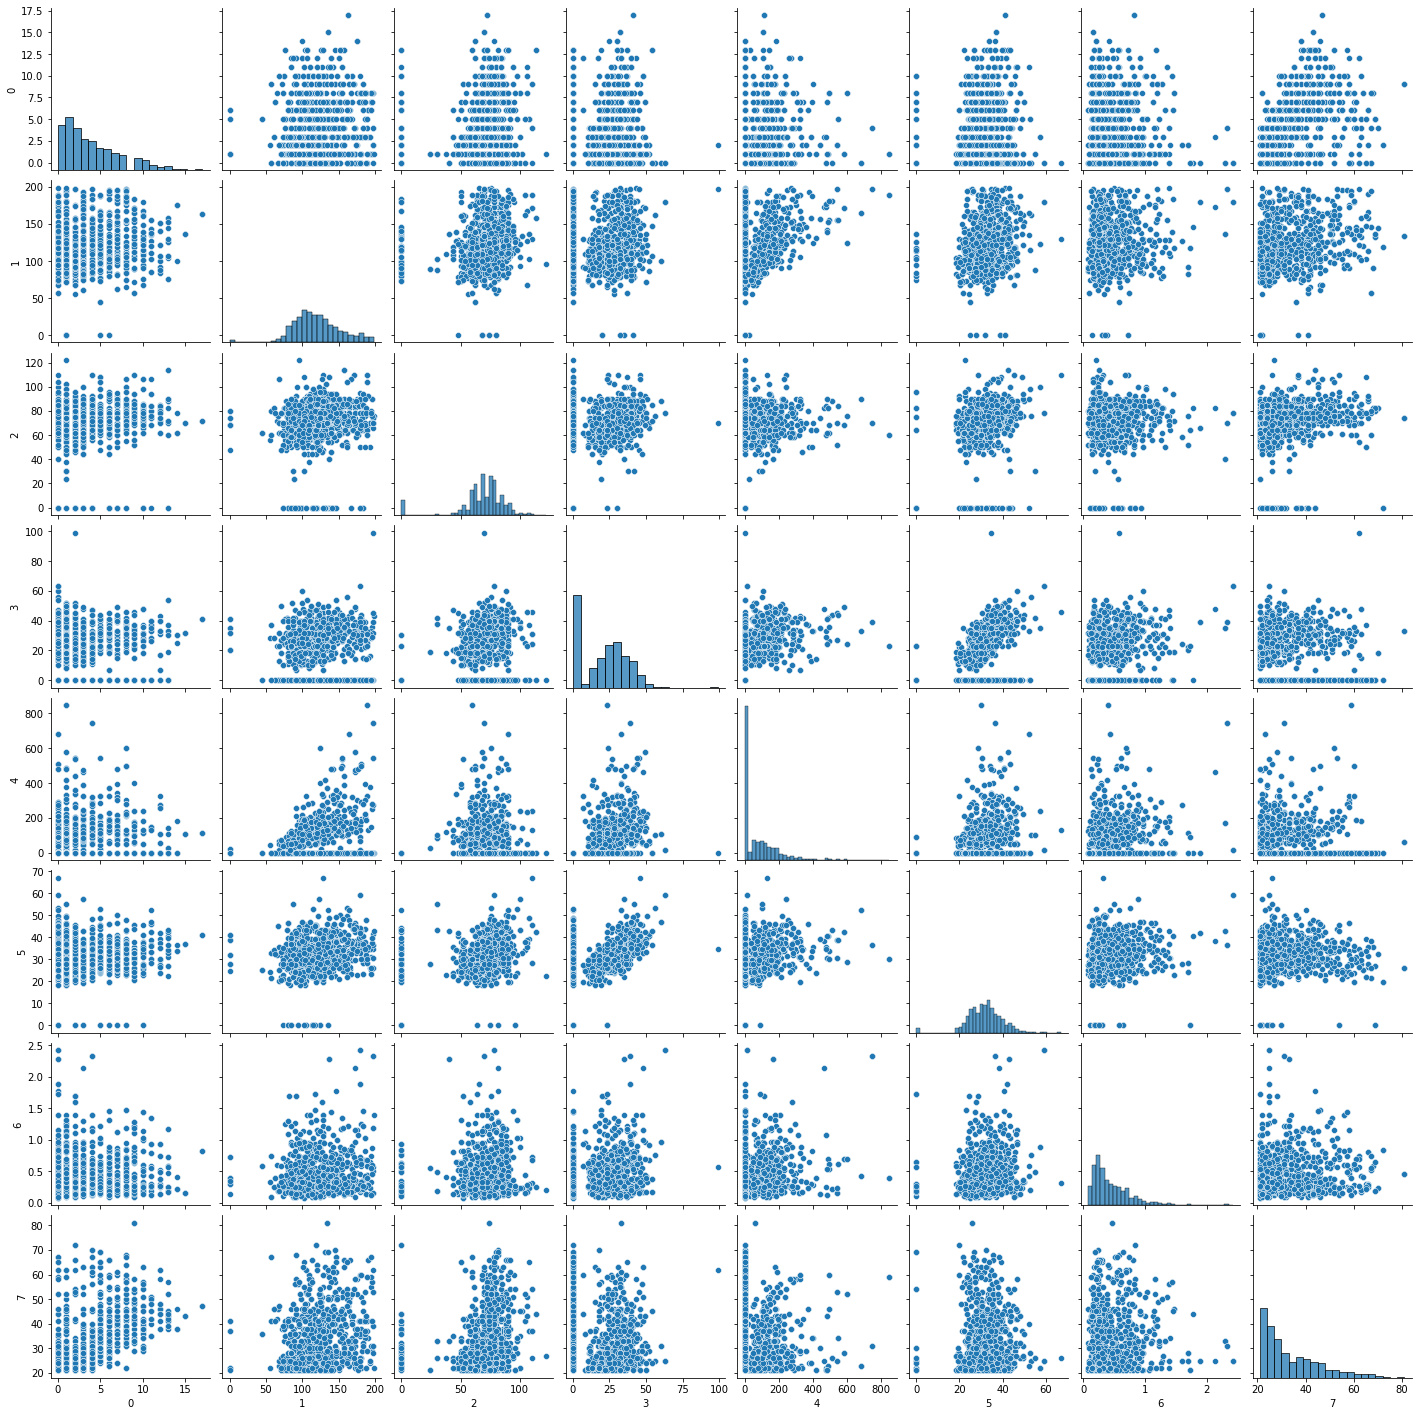

In [33]:
sns.pairplot(data=X_df)

In [23]:
# Remove diabetes outcome target from features data
y = final_diabetes_df.Outcome.values
X = final_diabetes_df.drop(columns="Outcome").values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, stratify=y) 

In [24]:
# Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=8))
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
33/33 [==============================] - 1s 3ms/step - loss: 0.6438 - accuracy: 0.6602
Epoch 2/50
33/33 [==============================] - 0s 2ms/step - loss: 0.5833 - accuracy: 0.6931
Epoch 3/50
33/33 [==============================] - 0s 1ms/step - loss: 0.5505 - accuracy: 0.7191
Epoch 4/50
33/33 [==============================] - 0s 2ms/step - loss: 0.5268 - accuracy: 0.7239
Epoch 5/50
33/33 [==============================] - 0s 2ms/step - loss: 0.5074 - accuracy: 0.7403
Epoch 6/50
33/33 [==============================] - 0s 1ms/step - loss: 0.4941 - accuracy: 0.7568
Epoch 7/50
33/33 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.7703
Epoch 8/50
33/33 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.7790
Epoch 9/50
33/33 [==============================] - 0s 2ms/step - loss: 0.4643 - accuracy: 0.7819
Epoch 10/50
33/33 [==============================] - 0s 2ms/step - loss: 0.4581 - accuracy: 0.7915
Epoch 11/50
33/33 [

In [53]:
model2 = tf.keras.models.Sequential()
model2.add(Dense(16, input_dim=8, activation='relu'))
model2.add(Dense(16, activation='tanh'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
hist2 = model2.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test,y_test))

Epoch 1/100
104/104 [==============================] - 1s 3ms/step - loss: 0.7275 - accuracy: 0.5357 - val_loss: 0.6293 - val_accuracy: 0.6358
Epoch 2/100
104/104 [==============================] - 0s 2ms/step - loss: 0.6202 - accuracy: 0.6554 - val_loss: 0.6089 - val_accuracy: 0.6618
Epoch 3/100
104/104 [==============================] - 0s 2ms/step - loss: 0.6076 - accuracy: 0.6564 - val_loss: 0.6060 - val_accuracy: 0.6590
Epoch 4/100
104/104 [==============================] - 0s 2ms/step - loss: 0.5957 - accuracy: 0.6680 - val_loss: 0.6057 - val_accuracy: 0.6647
Epoch 5/100
104/104 [==============================] - 0s 1ms/step - loss: 0.5802 - accuracy: 0.6834 - val_loss: 0.5955 - val_accuracy: 0.6705
Epoch 6/100
104/104 [==============================] - 0s 2ms/step - loss: 0.5699 - accuracy: 0.6921 - val_loss: 0.5942 - val_accuracy: 0.6763
Epoch 7/100
104/104 [==============================] - 0s 2ms/step - loss: 0.5673 - accuracy: 0.7124 - val_loss: 0.6024 - val_accuracy: 0.6936

In [51]:
_, accuracy = model2.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

44/44 [==============================] - 0s 1ms/step - loss: 0.4399 - accuracy: 0.7916
Accuracy: 79.16


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [52]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.8542471042471043
Testing Score: 0.5838150289017341


In [54]:
feature_importances = clf.feature_importances_

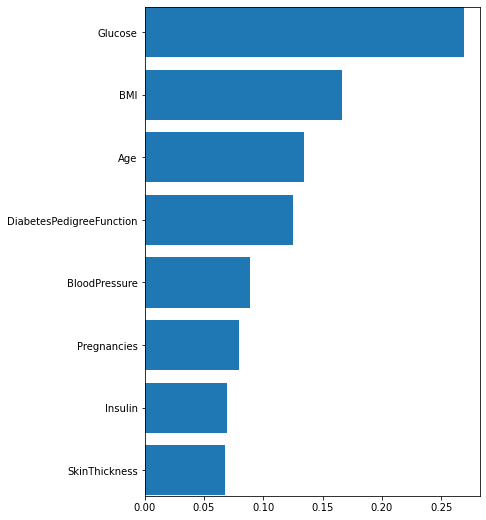

In [61]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(6,9)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [62]:
from sklearn.feature_selection import SelectFromModel

In [63]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500,
                                                 random_state=1))

In [64]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [71]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.9104046242774566


In [65]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')


Training Score: 0.6505791505791506
Testing Score: 0.661849710982659


In [66]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.7741312741312741
Testing Score: 0.7976878612716763
